In [1]:
from PIL import Image
# pip install Pillow
from Crypto.Cipher import AES
# pip install crypto pycryptodome
# pip uninstall crypto pycryptodome
# pip install pycryptodome

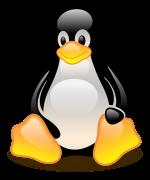

In [2]:
# load plaintext image
plaintextJPEG = Image.open('./penguin.jpg')
plaintextJPEG.save('./plaintext.ppm', 'ppm')
plaintextPPM = Image.open('./plaintext.ppm')
plaintextPPM

In [3]:
## process
plaintextPPM = open('./plaintext.ppm', 'rb') # read plaintext as binary file
cipher = open('./cipher.ppm', 'wb')
#copy = open('./copy.ppm', 'wb')

for i in range(3):
    buf = plaintextPPM.readline()
    print(buf)
    cipher.write(buf)
    #copy.write(buf)

b'P6\n'
b'150 180\n'
b'255\n'


In [4]:
key = b'FEFEFEFEFEFEFEFE'
#iv = Random.new().read(AES.block_size)
cipherBlock = AES.new(key, AES.MODE_ECB)

i = 0    
buf = plaintextPPM.read(16)
#print(i, '\t', buf)
i+=16

while buf:
    #copy.write(buf)
    
    # PKCS
    padding = 16 - len(buf)
    if padding != 0:
        for i in range(padding):
            buf += bytes([padding])
    #print(i, '\t', buf)
    
    ciphertext = cipherBlock.encrypt(buf)
    cipher.write(ciphertext)
    buf = plaintextPPM.read(16)
    i+=16

In [5]:
plaintextPPM.close()
cipher.close()

In [6]:
cipherPPM = Image.open('./cipher.ppm')
cipherPPM
cipherPPM.close()

In [7]:
cipher = open('./cipher.ppm', 'rb')
decrypt = open('./decrypt.ppm', 'wb')
for i in range(3):
    buf = cipher.readline()
    #print(buf)
    decrypt.write(buf)
    #copy.write(buf)

In [8]:
key = b'FEFEFEFEFEFEFEFE'
#iv = Random.new().read(AES.block_size)
cipherBlock = AES.new(key, AES.MODE_ECB)

i = 0
buf = cipher.read(16)
#print(i, '\t', buf)
i+=16

while buf:
    #copy.write(buf)
    
    # PKCS
    padding = 16 - len(buf)
    if padding != 0:
        for i in range(padding):
            buf += bytes([padding])
    #print(i, '\t', buf)
    
    ciphertext = cipherBlock.decrypt(buf)
    decrypt.write(ciphertext)
    buf = cipher.read(16)
    i+=16

In [9]:
decrypt.close()
decrypt = Image.open('decrypt.ppm')
decrypt.save('decrypt.jpg', 'jpeg')
#decrypt

In [10]:
# output cipher image
cipherPPM = Image.open('./cipher.ppm')
cipherPPM.save('./cipher.jpg', 'jpeg')
cipherPPM.close()